<a href="https://colab.research.google.com/github/jideilori/hamoye-ds/blob/master/stage_e_household_power_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip /content/household_power_consumption.zip

--2020-10-12 15:44:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20640916 (20M) [application/x-httpd-php]
Saving to: ‘household_power_consumption.zip’

household_power_con 100%[===================>]  19.68M  22.6MB/s    in 0.9s    

2020-10-12 15:44:39 (22.6 MB/s) - ‘household_power_consumption.zip’ saved [20640916/20640916]

Archive:  /content/household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [3]:
pd.set_option('display.max_columns', 10)
df = pd.read_csv('household_power_consumption.txt', 
              sep=';',
              header=0, 
              low_memory=False,
              infer_datetime_format=True,
              parse_dates={'Datetime':[0,1]}) 
print(df.shape)

(2075259, 8)


In [4]:
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
# check for missing values
df.isnull().sum()

Datetime                     0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
# mark all missing values
df.replace('?', np.nan, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    object        
 2   Global_reactive_power  object        
 3   Voltage                object        
 4   Global_intensity       object        
 5   Sub_metering_1         object        
 6   Sub_metering_2         object        
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [9]:
# add a column for for the remainder of sub metering
df[['Global_active_power', 'Global_reactive_power']] = df[['Global_active_power', 'Global_reactive_power']].astype(float)
df[['Voltage', 'Global_intensity']] = df[['Voltage', 'Global_intensity']].astype(float)
df[['Sub_metering_1', 'Sub_metering_2']] = df[['Sub_metering_1', 'Sub_metering_2']].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [10]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [11]:
df[['Global_active_power','Global_reactive_power']].corr()

,Global_active_power,Global_reactive_power
Global_active_power,1.000000,0.247017
Global_reactive_power,0.247017,1.000000


In [12]:
df = df.set_index('Datetime')


In [13]:
df_daily = pd.read_csv('household_power_consumption.txt', 
              sep=';',
              header=0, 
              low_memory=False,
              infer_datetime_format=True,
              )

In [15]:
df_daily.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [16]:
df_daily= df.resample('D')

In [17]:
df_daily = df.resample('D').mean()

In [18]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [19]:
df_daily[['Global_active_power', 'Global_reactive_power']] = df_daily[['Global_active_power', 'Global_reactive_power']].astype(float)
df_daily[['Voltage', 'Global_intensity']] = df_daily[['Voltage', 'Global_intensity']].astype(float)
df_daily[['Sub_metering_1', 'Sub_metering_2']] = df_daily[['Sub_metering_1', 'Sub_metering_2']].astype(float)
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1433 non-null   float64
 1   Global_reactive_power  1433 non-null   float64
 2   Voltage                1433 non-null   float64
 3   Global_intensity       1433 non-null   float64
 4   Sub_metering_1         1433 non-null   float64
 5   Sub_metering_2         1433 non-null   float64
 6   Sub_metering_3         1433 non-null   float64
dtypes: float64(7)
memory usage: 90.1 KB


In [20]:
df_daily.fillna(df_daily.mean(), inplace=True)

In [21]:
df_daily.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


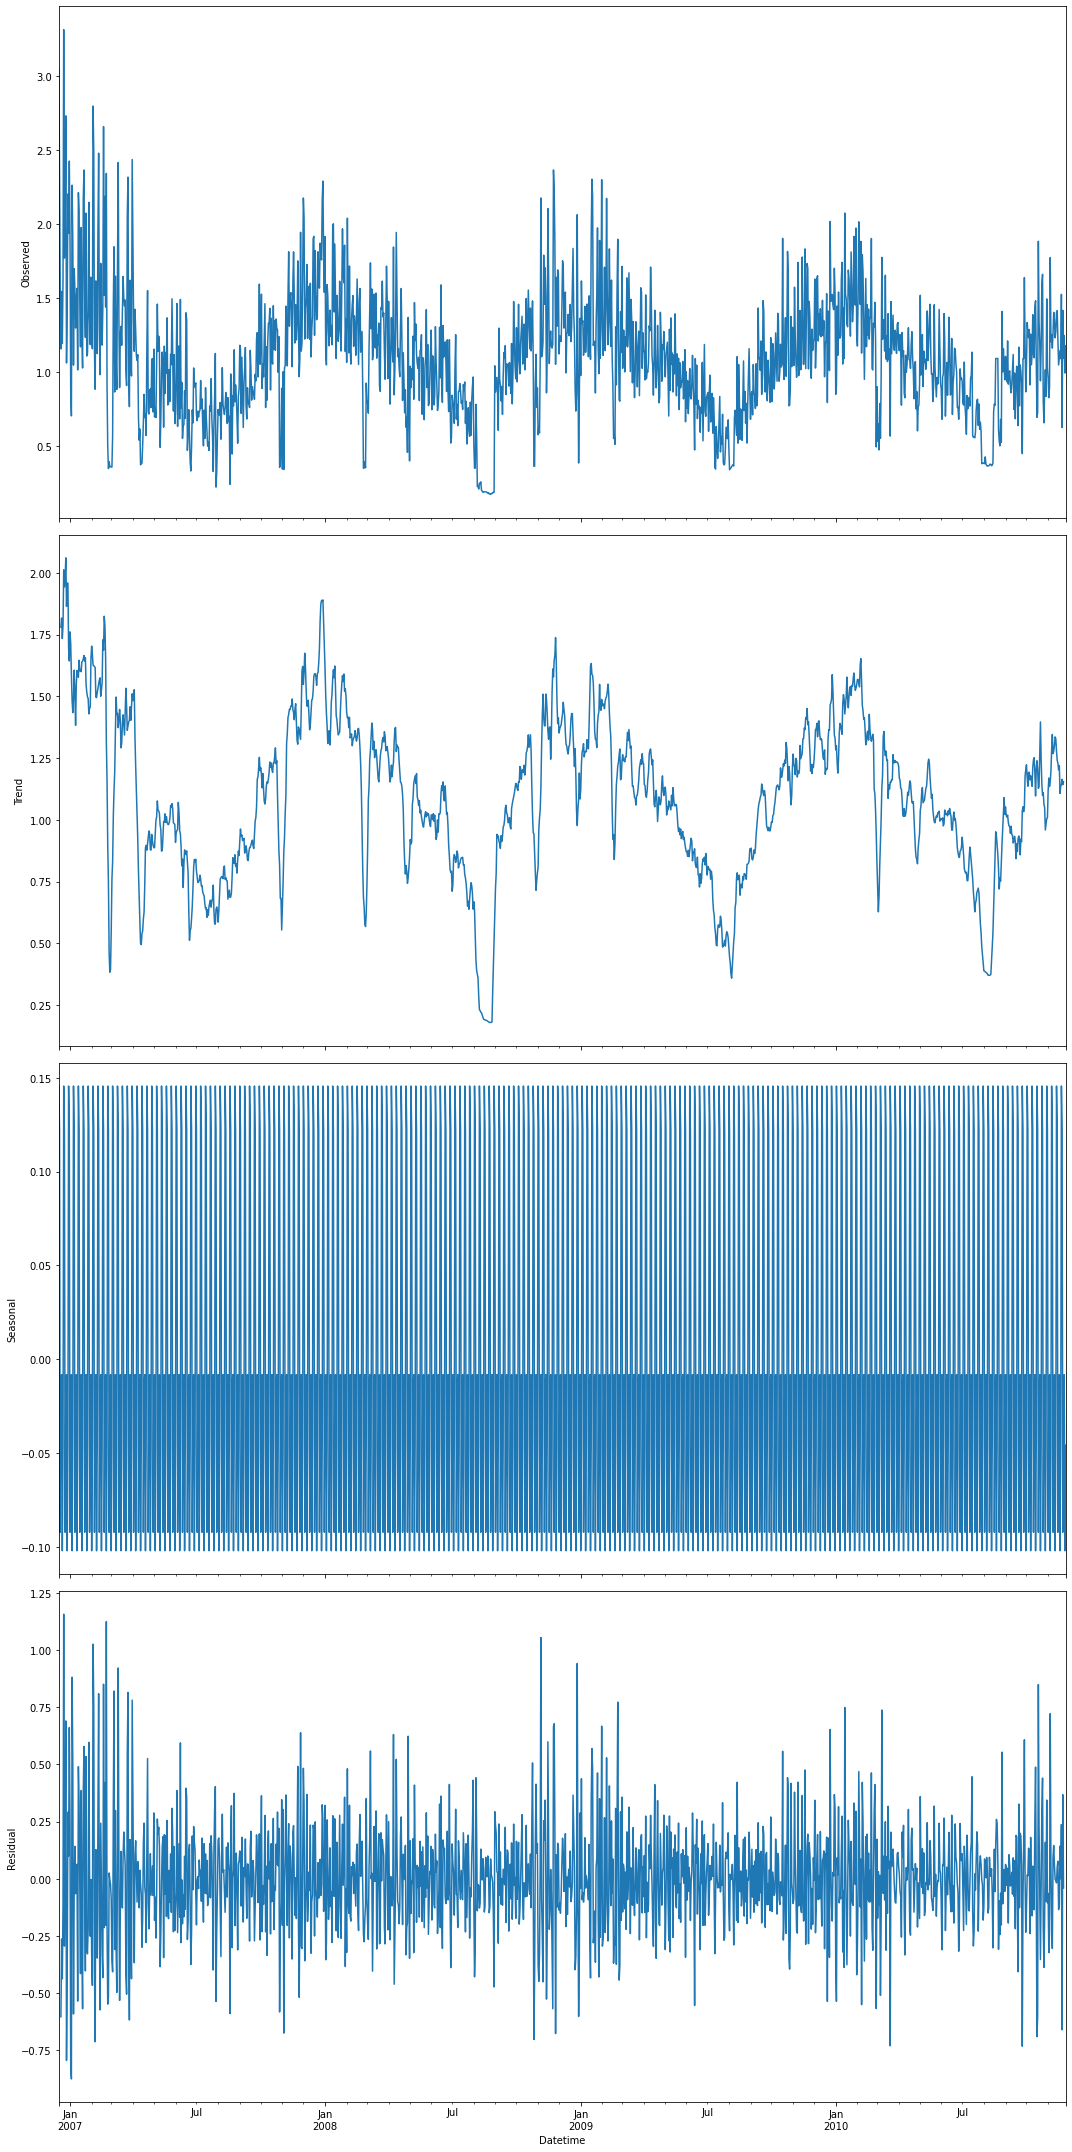

In [22]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 30
decompose_series = sm.tsa.seasonal_decompose(df_daily['Global_active_power'],
                                             model='additive')
decompose_series.plot()
plt.show()

In [23]:
df_daily[['Global_active_power','Global_reactive_power']].corr(method='pearson')

,Global_active_power,Global_reactive_power
Global_active_power,1.000000,0.039504
Global_reactive_power,0.039504,1.000000


In [24]:
df_daily.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.039504,0.111052,0.999187,0.541115,0.474655,0.728800
Global_reactive_power,0.039504,1.000000,-0.055753,0.060933,0.322859,0.183405,0.028143
Voltage,0.111052,-0.055753,1.000000,0.085400,-0.070000,-0.078775,0.172435
Global_intensity,0.999187,0.060933,0.085400,1.000000,0.553015,0.483713,0.720247
Sub_metering_1,0.541115,0.322859,-0.070000,0.553015,1.000000,0.249159,0.301549
Sub_metering_2,0.474655,0.183405,-0.078775,0.483713,0.249159,1.000000,0.196551
Sub_metering_3,0.728800,0.028143,0.172435,0.720247,0.301549,0.196551,1.000000


In [25]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [26]:
pd.set_option('display.max_columns', 10)
df2 = pd.read_csv('household_power_consumption.txt', 
              sep=';',
              header=0, 
              low_memory=False,
              infer_datetime_format=True,
              parse_dates={'Datetime':[0,1]}) 
print(df.shape)

(2075259, 7)


In [27]:
df_daily = df.resample('D').sum()

In [28]:
print(len(df_daily))
1442-365

1442


1077

In [29]:
df_daily = df.resample('D').sum()

In [30]:
df_daily.reset_index(inplace=True)
df_daily.columns

Index(['Datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [31]:
df_daily.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [32]:
train=df_daily[['Datetime', 'Global_active_power']]
train.columns

Index(['Datetime', 'Global_active_power'], dtype='object')

In [33]:
train = train[:365]
test = train[1076:-1]
from fbprophet import Prophet
# prepare expected column names
train.columns = ['ds', 'y']
train['ds']= train['ds']
test['y'] = train['y']
# define the model
model = Prophet()
# fit the model
model.fit(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
# future = model.make_future_dataframe(periods=213)
# forecast = model.predict(future)